In [1]:
%pylab inline
from fastai.vision import *
from pathlib import Path
import pandas as pd
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
path=Path('data')

In [3]:
path.ls()

[PosixPath('data/img'), PosixPath('data/Anno')]

In [4]:
f=open(path/"Anno/list_category_cloth.txt", "r")
contents =f.read().splitlines()
print(contents)


['50', 'category_name  category_type', 'Anorak         1', 'Blazer         1', 'Blouse         1', 'Bomber         1', 'Button-Down    1', 'Cardigan       1', 'Flannel        1', 'Halter         1', 'Henley         1', 'Hoodie         1', 'Jacket         1', 'Jersey         1', 'Parka          1', 'Peacoat        1', 'Poncho         1', 'Sweater        1', 'Tank           1', 'Tee            1', 'Top            1', 'Turtleneck     1', 'Capris         2', 'Chinos         2', 'Culottes       2', 'Cutoffs        2', 'Gauchos        2', 'Jeans          2', 'Jeggings       2', 'Jodhpurs       2', 'Joggers        2', 'Leggings       2', 'Sarong         2', 'Shorts         2', 'Skirt          2', 'Sweatpants     2', 'Sweatshorts    2', 'Trunks         2', 'Caftan         3', 'Cape           3', 'Coat           3', 'Coverup        3', 'Dress          3', 'Jumpsuit       3', 'Kaftan         3', 'Kimono         3', 'Nightdress     3', 'Onesie         3', 'Robe           3', 'Romper         3', '

In [5]:
num_classes = int(contents[0])
print(num_classes)

50


In [6]:
classes = []
for i in range(2,len(contents)):
    classes.append(contents[i].split(" ")[0])
print(classes)

['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Cardigan', 'Flannel', 'Halter', 'Henley', 'Hoodie', 'Jacket', 'Jersey', 'Parka', 'Peacoat', 'Poncho', 'Sweater', 'Tank', 'Tee', 'Top', 'Turtleneck', 'Capris', 'Chinos', 'Culottes', 'Cutoffs', 'Gauchos', 'Jeans', 'Jeggings', 'Jodhpurs', 'Joggers', 'Leggings', 'Sarong', 'Shorts', 'Skirt', 'Sweatpants', 'Sweatshorts', 'Trunks', 'Caftan', 'Cape', 'Coat', 'Coverup', 'Dress', 'Jumpsuit', 'Kaftan', 'Kimono', 'Nightdress', 'Onesie', 'Robe', 'Romper', 'Shirtdress', 'Sundress']


In [7]:
f=open(path/"Anno/list_category_img.txt", "r")
labels_content =f.read().splitlines()

In [8]:
labels = []
for i in range(2,len(labels_content)):
    labels.append(labels_content[i].split())
print(labels[0:2])

[['img/Sheer_Pleated-Front_Blouse/img_00000001.jpg', '3'], ['img/Sheer_Pleated-Front_Blouse/img_00000002.jpg', '3']]


In [9]:
labels_df = pd.DataFrame(labels)
labels_df.rename(columns = {0:'filename',1:'label'}, inplace = True) 
labels_df.head()

,filename,label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3


In [10]:
data=ImageDataBunch.from_df(path=path/"img", df=labels_df, valid_pct=0.2, fn_col='filename', label_col='label', 
                            ds_tfms=get_transforms(), size=256, bs=64).normalize(imagenet_stats)

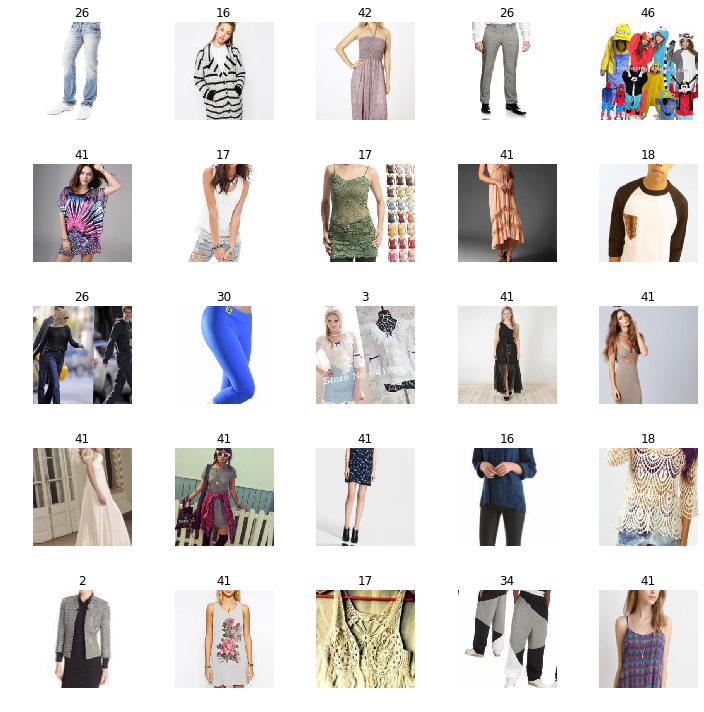

In [11]:
data.show_batch(figsize=(10,10))

In [12]:
learn=cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:05<00:00, 15808140.85it/s]


In [13]:
learn.freeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


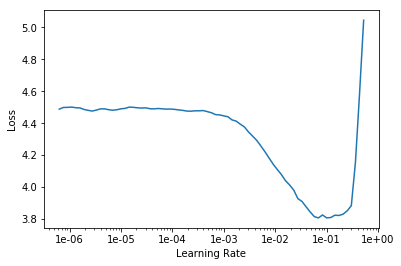

In [15]:
learn.recorder.plot()

In [17]:
lr=5e-2
learn.fit_one_cycle(4, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time


Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/h

KeyboardInterrupt: 

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(k=6, figsize=(12, 8))

In [ ]:
learn.save("trained_model_2")

## Showing results

In [ ]:
with torch.no_grad():
    x,y = next(iter(learn.data.valid_dl))
    yhat = learn.model(x.to('cuda'))

In [ ]:
x.shape, y[0].shape, yhat.shape